In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cars = pd.read_csv('Cars93.csv')

In [2]:
cars.drop(columns=['Unnamed: 0', 'Model', 'AirBags', 'Make'], inplace = True)

cars.dropna(inplace = True)

In [3]:
breakout = pd.get_dummies(cars['Manufacturer'])
breakout.drop(columns='Acura', inplace = True)
cars = cars.merge(breakout, how = 'inner', left_index = True, right_index = True)

breakout = pd.get_dummies(cars['DriveTrain'])
breakout.drop(columns='Front', inplace = True)
cars = cars.merge(breakout, how = 'inner', left_index = True, right_index = True)

breakout = pd.get_dummies(cars['Cylinders'])
breakout.drop(columns='4', inplace = True)
cars = cars.merge(breakout, how = 'inner', left_index = True, right_index = True)

breakout = pd.get_dummies(cars['Man.trans.avail'])
breakout.drop(columns='Yes', inplace = True)
cars = cars.merge(breakout, how = 'inner', left_index = True, right_index = True)

breakout = pd.get_dummies(cars['Origin'])
breakout.drop(columns='non-USA', inplace = True)
cars = cars.merge(breakout, how = 'inner', left_index = True, right_index = True)

cars = cars.merge(breakout, how = 'inner', left_index = True, right_index = True)
cars.drop(columns = ['Origin', 'Man.trans.avail', 'Cylinders', 'DriveTrain', 'Manufacturer'], inplace = True)



## MPG Regression

In [4]:
X = cars.drop(columns = 'MPG.highway')
breakout = pd.get_dummies(X['Type'])
breakout.drop(columns='Compact', inplace = True)

X = X.merge(breakout, how = 'inner', left_index = True, right_index = True)
X = X.drop(columns = ['MPG.city', 'Type'])

y = cars['MPG.highway']

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [5]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,30))
n_neighbors = list(range(1,20))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsRegressor()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_scaled_train,y_train)
#Print The value of best Hyperparameters
best_leaf = best_model.best_estimator_.get_params()['leaf_size']
best_p = best_model.best_estimator_.get_params()['p']
best_n = best_model.best_estimator_.get_params()['n_neighbors']
print('Best leaf_size:', best_leaf)
print('Best p:', best_p)
print('Best n_neighbors:', best_n)

Best leaf_size: 1
Best p: 1
Best n_neighbors: 13


In [6]:
regr = KNeighborsRegressor(leaf_size = best_leaf, n_neighbors = best_n, p = best_p)
regr.fit(X_scaled_train, y_train)

regr.score(X_scaled_test, y_test)

prediction = regr.predict(X_scaled_test)
predSeries = pd.Series(prediction)
y_test = y_test.reset_index(drop = 'True')

df = pd.concat([y_test, predSeries], axis=1)
df.columns = ['True','Predicted']

In [7]:
df

,True,Predicted
0,30,33.538462
1,26,28.461538
2,30,31.923077
3,24,28.230769
4,27,27.692308
5,22,25.846154
6,34,34.153846
7,28,29.615385
8,25,29.692308
9,26,28.384615


Text(0.5, 1.0, 'KNN')

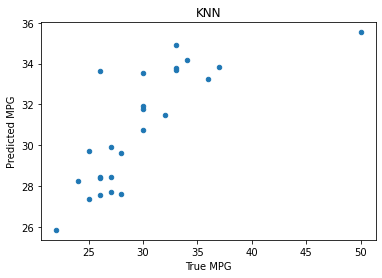

In [11]:
ax = df.plot(kind = 'scatter', x='True',y='Predicted')
ax.set_xlabel('True MPG')
ax.set_ylabel('Predicted MPG')
ax.set_title('KNN')

In [9]:
regr.score(X_scaled_test, y_test)

0.4894932483689881